<a href="https://colab.research.google.com/github/statistical-lies/Image-classification-with-convolutional-Neural-Network/blob/main/image_classification_with_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing packages
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [ ]:
#loan data and split into train and test
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
#checked shape of the x_train
X_train.shape

(50000, 32, 32, 3)

In [ ]:
#checked shape of x test
X_test.shape

(10000, 32, 32, 3)

In [ ]:
#reshaping y_train
y_train = y_train.reshape(-1,)
y_train[:50]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7,
       1, 1, 1, 2, 2, 0], dtype=uint8)

In [ ]:
#reshaping y_test
y_test = y_test.reshape(-1,)

In [ ]:
#setting our labeled data to labels
labels= ['airplane','automobile','bird','cat','deer','dog','frog','horse', 'ship', 'truck']

In [ ]:
# def x and y and setting it to our label
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(labels[y[index]])


(None, None)

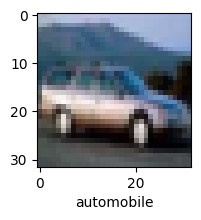

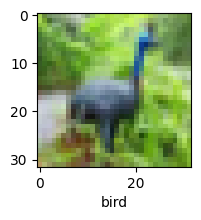

In [ ]:
#ploting and showing our train data set
plot_sample(X_train, y_train, 4),plot_sample(X_train, y_train, 6)

In [ ]:
#Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

# ANN WITH SGD

In [ ]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.8338 - accuracy: 0.3507
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6515 - accuracy: 0.4214
Epoch 3/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.5747 - accuracy: 0.4499
Epoch 4/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5204 - accuracy: 0.4687
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4774 - accuracy: 0.4831
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4404 - accuracy: 0.4962
Epoch 7/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4062 - accuracy: 0.5097
Epoch 8/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3775 - accuracy: 0.5210
Epoch 9/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3488 - accuracy: 0.5308
Epoch 10/10
1563/1563 [==============================] - 94s 60m

In [ ]:
#You can see that at the end of 10 epochs, accuracy is at around 54%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred1 = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred1]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.59      0.56      1000
           1       0.36      0.87      0.51      1000
           2       0.37      0.48      0.42      1000
           3       0.40      0.34      0.36      1000
           4       0.50      0.34      0.40      1000
           5       0.57      0.20      0.30      1000
           6       0.64      0.43      0.51      1000
           7       0.49      0.65      0.56      1000
           8       0.64      0.59      0.61      1000
           9       0.63      0.26      0.36      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.46     10000
weighted avg       0.51      0.47      0.46     10000



In [ ]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred1]
y_pred_classes[:20]

[3, 1, 8, 8, 4, 6, 1, 4, 3, 1, 8, 1, 1, 7, 1, 8, 7, 0, 8, 6]

In [ ]:
#actual value and  predicted value by the model
import pandas as pd

dt1=({'Actual value': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
 'Predicted value': [3, 1, 8, 8, 4, 6, 1, 4, 3, 1, 8, 1, 1, 7, 1, 8, 7, 0, 8, 6]})
df = pd.DataFrame(dt1)
print(df)


    Actual value  Predicted value
0              3                3
1              8                1
2              8                8
3              0                8
4              6                4
5              6                6
6              1                1
7              6                4
8              3                3
9              1                1
10             0                8
11             9                1
12             5                1
13             7                7
14             9                1
15             8                8
16             5                7
17             7                0
18             8                8
19             6                6


# ANN WITH ADAM

In [ ]:
#Build simple artificial neural network for image classification using ADAM optimizer
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 247s 158ms/step - loss: 1.9125 - accuracy: 0.3306
Epoch 2/10
1563/1563 [==============================] - 248s 159ms/step - loss: 1.6755 - accuracy: 0.4007
Epoch 3/10
1563/1563 [==============================] - 249s 159ms/step - loss: 1.6005 - accuracy: 0.4261
Epoch 4/10
1563/1563 [==============================] - 253s 162ms/step - loss: 1.5636 - accuracy: 0.4427
Epoch 5/10
1563/1563 [==============================] - 266s 170ms/step - loss: 1.5292 - accuracy: 0.4533
Epoch 6/10
1563/1563 [==============================] - 258s 165ms/step - loss: 1.5098 - accuracy: 0.4607
Epoch 7/10
1563/1563 [==============================] - 262s 168ms/step - loss: 1.4890 - accuracy: 0.4682
Epoch 8/10
1563/1563 [==============================] - 257s 164ms/step - loss: 1.4689 - accuracy: 0.4766
Epoch 9/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.4509 - accuracy: 0.4821
Epoch 10/10
1563/1563 [=======================

(None, None)

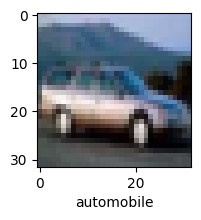

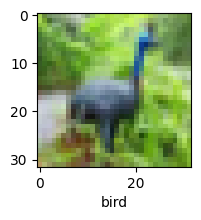

In [ ]:
plot_sample(X_train, y_train, 4),plot_sample(X_train, y_train, 6)

In [ ]:
 #You can see that at the end of 10 epochs, accuracy is at around 50%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred2 = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred2]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1000
           1       0.64      0.59      0.61      1000
           2       0.33      0.39      0.36      1000
           3       0.36      0.26      0.30      1000
           4       0.41      0.34      0.37      1000
           5       0.35      0.46      0.40      1000
           6       0.51      0.56      0.54      1000
           7       0.54      0.56      0.55      1000
           8       0.60      0.64      0.62      1000
           9       0.59      0.49      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [ ]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred2]
y_pred_classes[:20]

[3, 8, 0, 8, 4, 6, 3, 6, 2, 1, 8, 9, 5, 7, 1, 8, 5, 3, 8, 6]

In [ ]:
import pandas as pd

dt2=[[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],[3, 8, 0, 8, 4, 6, 3, 6, 2, 1, 8, 9, 5, 7, 1, 8, 5, 3, 8, 6]]
df2 = pd.DataFrame(dt2).transpose()
df2.columns = ['Actual value', 'Predicted value']
print(df2)

    Actual value  Predicted value
0              3                3
1              8                8
2              8                0
3              0                8
4              6                4
5              6                6
6              1                3
7              6                6
8              3                2
9              1                1
10             0                8
11             9                9
12             5                5
13             7                7
14             9                1
15             8                8
16             5                5
17             7                3
18             8                8
19             6                6


## CNN WITH ADAM

In [ ]:
#Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4849 - accuracy: 0.4660
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1407 - accuracy: 0.5992
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0054 - accuracy: 0.6485
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9137 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8521 - accuracy: 0.7027
Epoch 6/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7988 - accuracy: 0.7209
Epoch 7/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.7453 - accuracy: 0.7405
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7085 - accuracy: 0.7529
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6704 - accuracy: 0.7660
Epoch 10/10
1563/1563 [==============================] - 64s 41m

In [ ]:
#With CNN, at the end 10 epochs, accuracy was at around 78% which is a significant improvement over ANN. CNN's
#are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN
#as maxpooling reduces the image dimensions while still preserving the features

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9095 - accuracy: 0.6999


[0.9094510674476624, 0.6998999714851379]

In [ ]:
 #You can see that at the end of 10 epochs, accuracy is at around 78%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_cnn = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.80      0.82      0.81      1000
           2       0.60      0.62      0.61      1000
           3       0.56      0.47      0.51      1000
           4       0.72      0.58      0.64      1000
           5       0.60      0.60      0.60      1000
           6       0.78      0.75      0.76      1000
           7       0.69      0.76      0.72      1000
           8       0.85      0.77      0.81      1000
           9       0.69      0.85      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
y_prediction = [np.argmax(element) for element in y_pred_cnn]
y_prediction[:20]

[3, 8, 8, 0, 6, 6, 9, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 4, 8, 6]

In [ ]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [ ]:
import pandas as pd

dt1=[[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 4, 8, 6],[3, 8, 8, 0, 6, 6, 9, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 4, 8, 6]]
df = pd.DataFrame(dt1).transpose()
df.columns = ['Actual value', 'Predicted value']
print(df)

    Actual value  Predicted value
0              3                3
1              8                8
2              8                8
3              0                0
4              6                6
5              6                6
6              1                9
7              6                6
8              3                3
9              1                1
10             0                0
11             9                9
12             5                5
13             7                7
14             9                9
15             8                8
16             5                5
17             4                4
18             8                8
19             6                6


## CNN WITH SGD

In [ ]:
#Now let us build a convolutional neural network to train our images with SGD optimizer
cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.9338 - accuracy: 0.2987
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5482 - accuracy: 0.4436
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4076 - accuracy: 0.4964
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3123 - accuracy: 0.5351
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2292 - accuracy: 0.5656
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.1586 - accuracy: 0.5924
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0994 - accuracy: 0.6147
Epoch 8/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0497 - accuracy: 0.6346
Epoch 9/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0028 - accuracy: 0.6509
Epoch 10/10
1563/1563 [==============================] - 65s 42m

In [ ]:
cnn1.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.0265 - accuracy: 0.6422


[1.0264545679092407, 0.6421999931335449]

In [ ]:
 #You can see that at the end of 10 epochs, accuracy is at around 66%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_cnn1 = cnn1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred_cnn1]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.76      0.69      1000
           1       0.74      0.80      0.77      1000
           2       0.64      0.41      0.50      1000
           3       0.54      0.34      0.41      1000
           4       0.55      0.63      0.58      1000
           5       0.47      0.69      0.56      1000
           6       0.73      0.70      0.72      1000
           7       0.72      0.70      0.71      1000
           8       0.82      0.65      0.72      1000
           9       0.68      0.75      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000



In [ ]:
y_prediction = [np.argmax(element) for element in y_pred_cnn1]
y_prediction[:20]

[3, 1, 8, 0, 4, 6, 1, 6, 5, 1, 0, 9, 5, 7, 9, 8, 5, 3, 8, 6]

In [ ]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

In [ ]:
import pandas as pd

dt1=[[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 4, 8, 6],[3, 1, 8, 0, 4, 6, 1, 6, 5, 1, 0, 9, 5, 7, 9, 8, 5, 3, 8, 6]]
df = pd.DataFrame(dt1).transpose()
df.columns = ['Actual value', 'Predicted value']
print(df)

    Actual value  Predicted value
0              3                3
1              8                1
2              8                8
3              0                0
4              6                4
5              6                6
6              1                1
7              6                6
8              3                5
9              1                1
10             0                0
11             9                9
12             5                5
13             7                7
14             9                9
15             8                8
16             5                5
17             4                3
18             8                8
19             6                6
